In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def PlotPolly(model, x_values, y_values, name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    
    plt.plot(x_values, y_values, '.', x_new, y_new, '-')
    plt.title('Polynominal Fir with Matplotlib for Price')
    plt.xlabel(name)
    plt.ylabel('Price of Cars')
    plt.show()
    plt.close()

In [5]:
X = df['highway-mpg']
y = df['price']

In [6]:
f = np.polyfit(X, y, 3)
p = np.poly1d(f)
p

poly1d([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

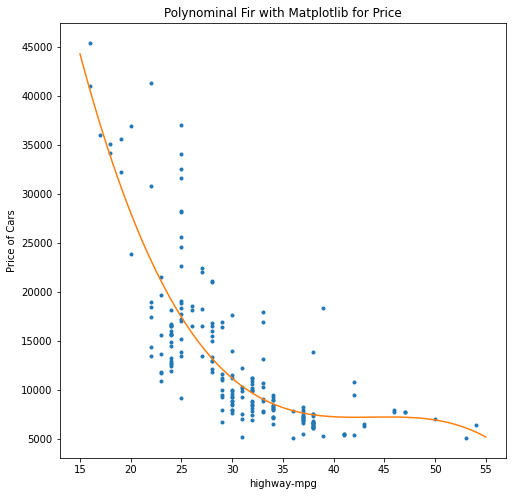

In [7]:
plt.figure(figsize=(8,8))
PlotPolly(p, X, y, 'highway-mpg')

## Multiple Polynominal

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [9]:
#nâng bậc 2
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [10]:
X1 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y1 = df['price']

In [11]:
X1_pr = pr.fit_transform(X1)

In [12]:
X1.shape, X1_pr.shape

((201, 4), (201, 15))

In [13]:
lm1_pr = LinearRegression()

In [14]:
lm1_pr.fit(X1_pr, y1)

LinearRegression()

In [15]:
yhat1 = lm1_pr.predict(X1_pr)

In [16]:
a = lm1_pr.intercept_
a

-21262.848277003563

In [17]:
b = lm1_pr.coef_
b

array([ 0.00000000e+00,  3.79990747e+02,  9.53081616e+00, -1.06265103e+02,
        1.82168928e+02,  1.69423474e+00, -1.86864385e-01, -1.29043091e+00,
       -2.14860064e+00,  7.57100954e-04,  1.11910005e-01, -1.92007463e-01,
        8.95252693e-02,  4.23869258e-02,  4.66019878e+00])

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


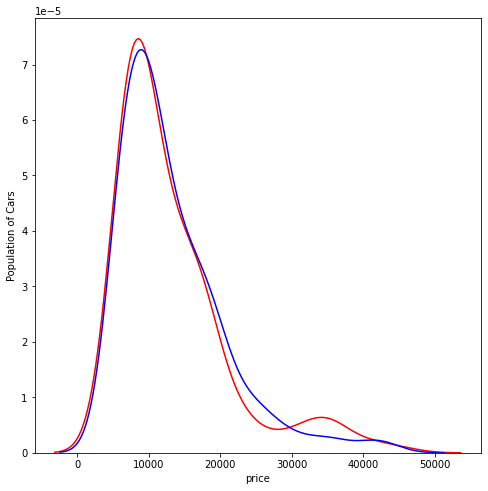

In [18]:
plt.figure(figsize=(8,8))
ax1 = sns.distplot(y1, hist=False, color='r', label='Actual Value')
sns.distplot(yhat1, hist=False, color='b', label='Predict Value', ax=ax1)
plt.ylabel('Population of Cars')
plt.show()

In [26]:
#nâng bậc 3
pr3 = PolynomialFeatures(degree=3)
pr3

PolynomialFeatures(degree=3)

In [27]:
X1_pr3 = pr3.fit_transform(X1)

In [28]:
X1_pr3.shape

(201, 35)

In [29]:
lm1_pr3 = LinearRegression()

In [30]:
lm1_pr3.fit(X1_pr3, y1)

LinearRegression()

In [31]:
yhat3 = lm1_pr3.predict(X1_pr3)

In [32]:
a = lm1_pr3.intercept_
a

47431826.91020174

In [33]:
b = lm1_pr3.coef_
b

array([-4.77292000e+07, -5.25745816e+02, -4.19424032e+01,  4.48210143e+03,
        1.69717605e+04, -1.21052691e+01,  3.23673543e+00, -2.29595218e+01,
        1.84258508e+00, -3.52689592e-02, -1.90476677e+00,  3.51816178e+00,
        1.52219047e+01, -1.91220974e+02, -3.09488715e+02, -2.00183417e-01,
       -6.20656618e-03,  7.14196242e-01,  9.17616397e-02, -3.27493891e-05,
       -4.12785824e-03, -3.49184202e-02, -5.30652472e-01,  2.43144843e-01,
        1.30160146e-01,  4.03918030e-05, -1.75655291e-03, -2.30034700e-03,
        3.22589671e-02,  1.33779623e-01, -5.63614955e-02, -2.98837213e-02,
       -1.18491804e+00,  1.93830327e+00,  1.96823374e+00])

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


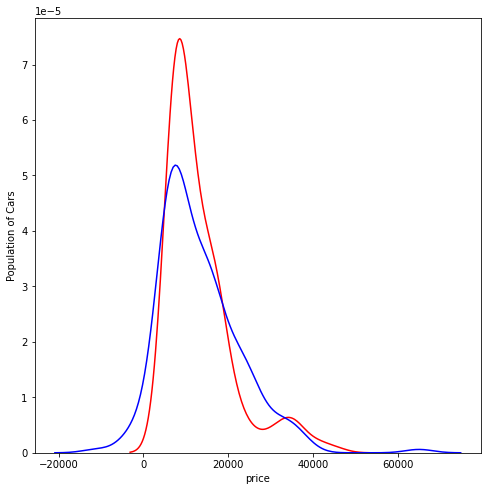

In [34]:
plt.figure(figsize=(8,8))
ax1 = sns.distplot(y1, hist=False, color='r', label='Actual Value')
sns.distplot(yhat3, hist=False, color='b', label='Predict Value', ax=ax1)
plt.ylabel('Population of Cars')
plt.show()